## TAREA 2

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [7]:
'''
from google.colab import files
uploaded=files.upload()
'''

Saving BaseDatos_Mod.csv to BaseDatos_Mod.csv


In [8]:
#base de datos sin outliers
df= pd.read_csv("BaseDatos_Mod.csv")
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,Class
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [9]:
df_data=df.iloc[:,[0,1,2,3,4,5,6,7]]
target=df['Class']
df_data.shape, target.shape

((583, 8), (583,))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5dac208a20>,
      dtype=object)

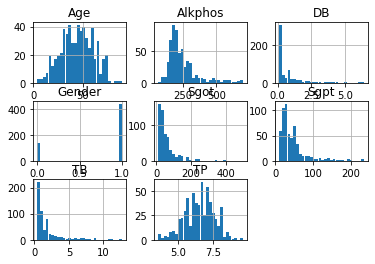

In [10]:
df_data.hist(bins=30,rwidth=0.95)

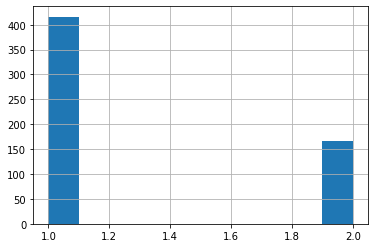

In [11]:
target.hist()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_data, target, test_size=0.2, random_state=0)

In [0]:
#FUNCION resultados

In [0]:
def resultados(matriz_cnf):
    sens= matriz_cnf[1,1]/(matriz_cnf[1,1]+matriz_cnf[1,0])
    esp=matriz_cnf[0,0]/(matriz_cnf[0,0]+matriz_cnf[0,1])
    falsoneg=matriz_cnf[1,0]
    print("La sensibilidad es: ",sens," la especificidad es: ",esp," y los falsos negativos son: ", falsoneg)

In [0]:
# Funcion cfm

In [0]:
def matriz_confusion(cnf):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

### BALANCEAR

In [17]:
from imblearn.under_sampling import NearMiss

desbal = NearMiss(ratio=1, n_neighbors=3, version=2, random_state=2)

X_train_res, y_train_res = desbal.fit_sample(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [18]:
print(len(y_train_res))
n=0
for i in y_train_res:
    if i==1:
        n=n+1
print(n)

256
128


### ESTANDARIZAR

In [0]:
from sklearn.preprocessing import StandardScaler

escalar=StandardScaler()
X_train_normalizado= escalar.fit_transform(X_train)
X_test_normalizado= escalar.transform(X_test)

## REGRESION LOGISTICA

In [105]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log_nor=logreg.predict(X_test_normalizado)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [106]:
from sklearn import metrics

cnf_matrix_nor = metrics.confusion_matrix(y_test, y_pred_log_nor)
print("Accuracy normalizando:",metrics.accuracy_score(y_test,y_pred_log_nor))
print(cnf_matrix_nor)

Accuracy normalizando: 0.4358974358974359
[[12 66]
 [ 0 39]]


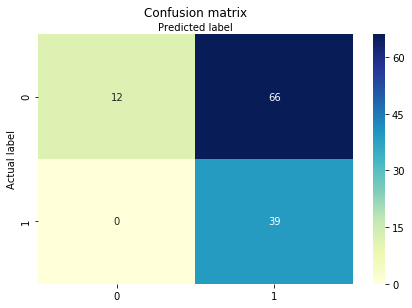

In [107]:
matriz_confusion(cnf_matrix_nor)

### Resultados

In [120]:
resultados(cnf_matrix_nor)

La sensibilidad es:  1.0  la especificidad es:  0.15384615384615385  y los falsos negativos son:  0


### DATOS BALANCEADOS

In [0]:
logreg= LogisticRegression()
logreg.fit(X_train_res_nor,y_train_res)
y_pred_log=logreg.predict(X_test_normalizado)

In [0]:
reg_ac_val=cross_val_score(logreg, X_train_res_nor, y_train_res, cv=3, scoring='accuracy').mean()
reg_pre_val=cross_val_score(logreg, X_train_res_nor, y_train_res, cv=3, scoring='precision').mean()
reg_rec_val=cross_val_score(logreg, X_train_res_nor, y_train_res, cv=3, scoring='recall').mean()

In [112]:
reg_ac=metrics.accuracy_score(y_test,y_pred_log)
print("Accuracy normalizando:",metrics.accuracy_score(y_test,y_pred_log))

Accuracy normalizando: 0.6068376068376068


#### Matriz de confusión

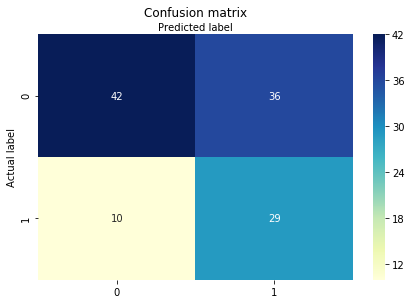

In [113]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)

matriz_confusion(cnf_matrix)

In [118]:
cnf_matrix[1][0]

10

#### Resultados

In [121]:
reg_sen = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
reg_neg = cnf_matrix[1][0]
resultados(cnf_matrix)

La sensibilidad es:  0.7435897435897436  la especificidad es:  0.5384615384615384  y los falsos negativos son:  10


## K-vecinos

In [122]:
from sklearn.neighbors import KNeighborsClassifier

k_values=list(range(1,31,2))
k_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
print(len(k_values),len(k_scores))

15 15


Text(0, 0.5, 'Cross-validated accuracy')

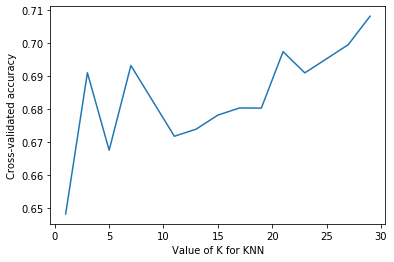

In [123]:
plt.plot(k_values, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [124]:
best_K_value=k_values[k_scores.index(max(k_scores))]
print('valor de k =',best_K_value)
print('score con k=',best_K_value,':', max(k_scores))

valor de k = 29
score con k= 29 : 0.7082023711055969


Entreno el modelo

In [125]:
knn = KNeighborsClassifier(n_neighbors=best_K_value)
knn.fit(X_train, y_train) 

y_pred_knn=knn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred_knn))#0.7987

Accuracy: 0.6923076923076923


#### Matriz confusion

In [0]:
cnf_matrix_knn=metrics.confusion_matrix(y_test, y_pred_knn)

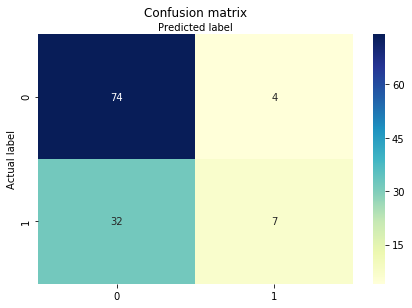

In [127]:
matriz_confusion(cnf_matrix_knn)

### Resultados

In [128]:
resultados(cnf_matrix_knn)

La sensibilidad es:  0.1794871794871795  la especificidad es:  0.9487179487179487  y los falsos negativos son:  32


#### Curva de Aprendizaje

15 15 15


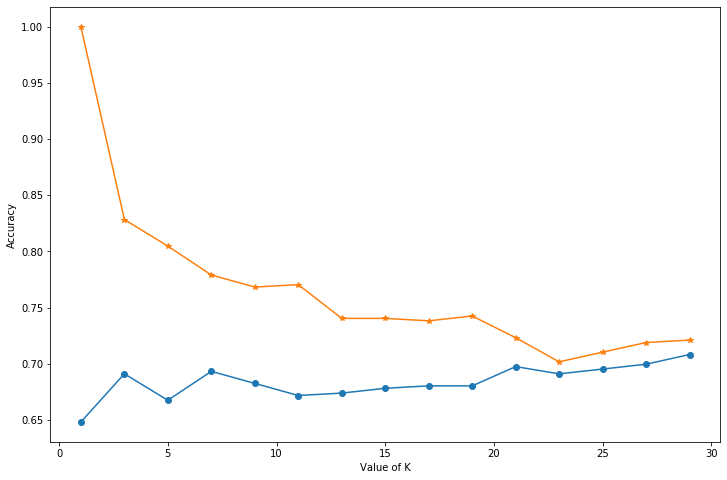

In [129]:
scores_train=[]
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    scores_train.append(knn.score(X_train,y_train))
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
print(len(scores_train),len(k_scores),len(k_values))
plt.figure(figsize=(12,8))
plt.plot(k_values, k_scores, marker='o', label='cross-validation')
plt.plot(k_values, scores_train, marker='*', label='train')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
knn_ac_val=max(k_scores)

### DATOS BALANCEADOS

In [130]:
k_values=list(range(1,31,2))
k_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_res_nor, y_train_res, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
print(len(k_values),len(k_scores))

15 15


Text(0, 0.5, 'Cross-validated accuracy')

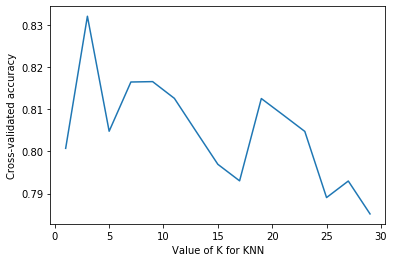

In [131]:
plt.plot(k_values, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [132]:
best_K_value=k_values[k_scores.index(max(k_scores))]
print('valor de k =',best_K_value)
print('score con k=',best_K_value,':', max(k_scores))

valor de k = 3
score con k= 3 : 0.8320565435476516


In [138]:
knn = KNeighborsClassifier(n_neighbors=best_K_value)
knn.fit(X_train_res_nor, y_train_res) 

knn_ac=knn.score(X_test_normalizado, y_test)

y_pred=knn.predict(X_test_normalizado)
print('accuracy:',knn.score(X_test_normalizado, y_test))#0.6752136752136753

accuracy: 0.7350427350427351


#### Matriz de Confusión

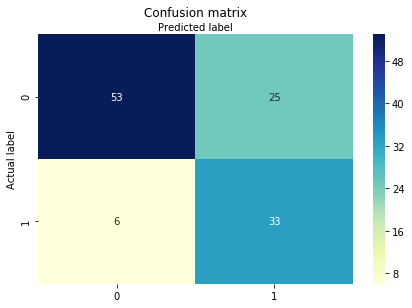

In [139]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
knn_sen = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0])
knn_neg = cnf_matrix[1,0]
matriz_confusion(cnf_matrix)

### Resultados

In [140]:
resultados(cnf_matrix)

La sensibilidad es:  0.8461538461538461  la especificidad es:  0.6794871794871795  y los falsos negativos son:  6


#### Curva de aprendizaje

15 15 15


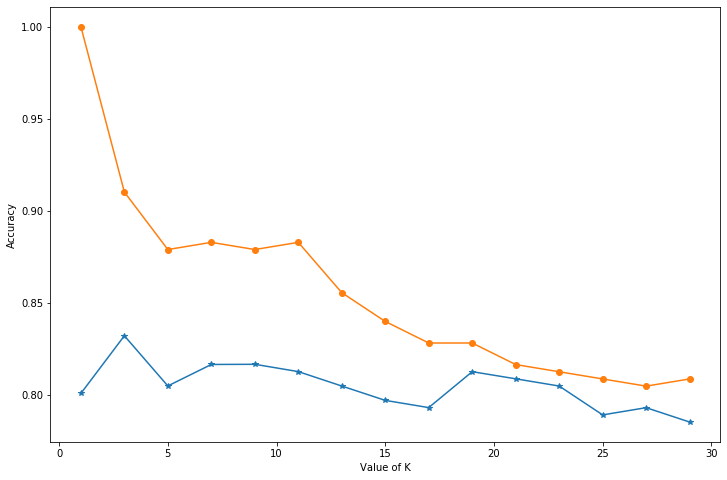

In [141]:
scores_train=[]
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res_nor, y_train_res) 
    scores_train.append(knn.score(X_train_res_nor,y_train_res))
    scores = cross_val_score(knn, X_train_res_nor, y_train_res, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
print(len(scores_train),len(k_scores),len(k_values))
plt.figure(figsize=(12,8))
plt.plot(k_values, k_scores, marker='*', label='cross-validation')
plt.plot(k_values, scores_train, marker='o', label='train')#naranja
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

knn_ac_val=max(k_scores)
knn_pre_val=cross_val_score(knn, X_train_res_nor, y_train_res, cv=3, scoring='precision').mean()
knn_rec_val=cross_val_score(knn, X_train_res_nor, y_train_res, cv=3, scoring='recall').mean()

## Árboles de clasificación (decisión)

In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

cv = 5 # Numero deseado de "folds" que haremos
k_scores = []
depth_range = range(1, 30)

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(tree, X_train, y_train, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-validated accuracy')

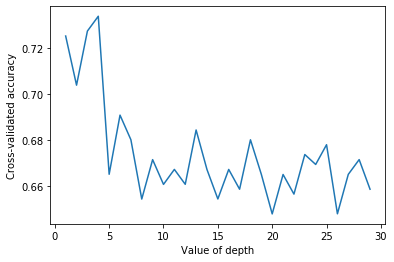

In [149]:
plt.plot(depth_range, k_scores)
plt.xlabel('Value of depth')
plt.ylabel('Cross-validated accuracy')

In [150]:
best_depth_value=depth_range[k_scores.index(max(k_scores))]
print('Valor de Depth:',best_depth_value)
print('score con depth=',best_depth_value,':', max(k_scores))

Valor de Depth: 4
score con depth= 4 : 0.7339123242349048


In [151]:
tree_model = DecisionTreeClassifier(max_depth =best_depth_value)

tree_model.fit(X_train,y_train)

y_pred_tree = tree_model.predict(X_test)

print('Accuracy :',tree_model.score(X_test, y_test))
tree_ac=tree_model.score(X_test, y_test)

Accuracy : 0.6495726495726496


#### Matriz confusión

In [0]:
cnf_matrix_tree= metrics.confusion_matrix(y_test, y_pred_tree)

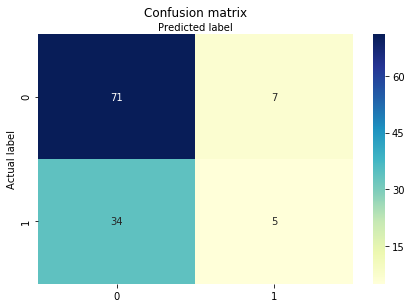

In [153]:
matriz_confusion(cnf_matrix_tree)

### Resultados

In [154]:
resultados(cnf_matrix_tree)

La sensibilidad es:  0.1282051282051282  la especificidad es:  0.9102564102564102  y los falsos negativos son:  34


#### Visualización

[Text(188.32500000000002, 195.696, 'X[2] <= 1.65\ngini = 0.398\nsamples = 466\nvalue = [338, 128]'),
 Text(111.60000000000001, 152.208, 'X[4] <= 211.5\ngini = 0.47\nsamples = 300\nvalue = [187, 113]'),
 Text(55.800000000000004, 108.72, 'X[0] <= 21.5\ngini = 0.498\nsamples = 190\nvalue = [101, 89]'),
 Text(27.900000000000002, 65.232, 'X[7] <= 8.45\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(13.950000000000001, 21.744, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(41.85, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(83.7, 65.232, 'X[2] <= 1.25\ngini = 0.494\nsamples = 178\nvalue = [99, 79]'),
 Text(69.75, 21.744, 'gini = 0.488\nsamples = 170\nvalue = [98, 72]'),
 Text(97.65, 21.744, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(167.4, 108.72, 'X[0] <= 14.0\ngini = 0.341\nsamples = 110\nvalue = [86, 24]'),
 Text(139.5, 65.232, 'X[1] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(125.55000000000001, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [

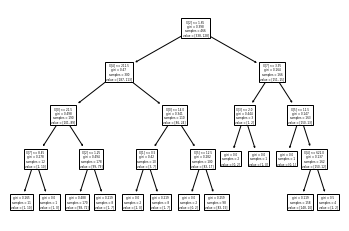

In [155]:
from sklearn import tree
tree.plot_tree(tree_model)

#### Curva de aprendizaje

29 29 29


Text(0, 0.5, 'Accuracy')

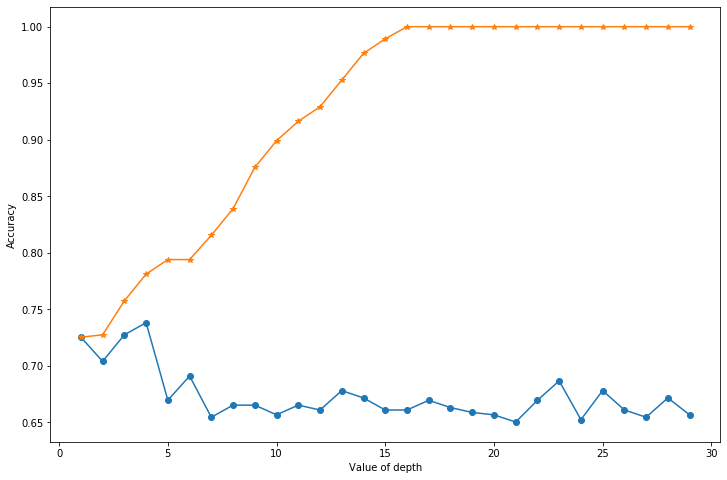

In [156]:
scores_train=[]
k_scores = []
depth_range = range(1, 30)

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(tree, X_train, y_train, cv=3, scoring='accuracy')
    tree.fit(X_train,y_train)
    scores_train.append(tree.score(X_train,y_train))
    k_scores.append(scores.mean())

print(len(scores_train),len(k_scores),len(depth_range))
plt.figure(figsize=(12,8))
plt.plot(depth_range , k_scores, marker='o', label='cross-validation')
plt.plot(depth_range , scores_train, marker='*', label='train')
plt.xlabel('Value of depth')
plt.ylabel('Accuracy')

### Datos Balanceados

In [0]:
cv = 5 # Numero deseado de "folds" que haremos
k_scores = []
depth_range = range(1, 30)

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(tree, X_train_res, y_train_res, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-validated accuracy')

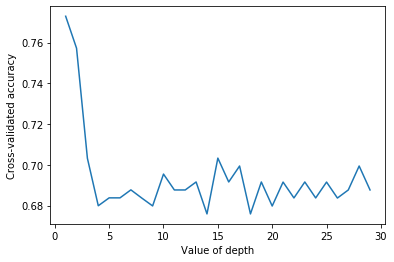

In [158]:
plt.plot(depth_range, k_scores)
plt.xlabel('Value of depth')
plt.ylabel('Cross-validated accuracy')

In [159]:
best_depth_value=depth_range[k_scores.index(max(k_scores))]
print('Valor de Depth:',best_depth_value)
print('score con depth=',best_depth_value,':', max(k_scores))

Valor de Depth: 1
score con depth= 1 : 0.7729594163246695


Entreno en modelo

In [160]:
tree_model = DecisionTreeClassifier(max_depth =best_depth_value)

tree_model.fit(X_train_res,y_train_res)

y_pred = tree_model.predict(X_test)
tree_ac=tree_model.score(X_test, y_test)

print('Accuracy:',tree_model.score(X_test, y_test))

Accuracy: 0.6239316239316239


#### Matriz de confusion

[[44 34]
 [10 29]]


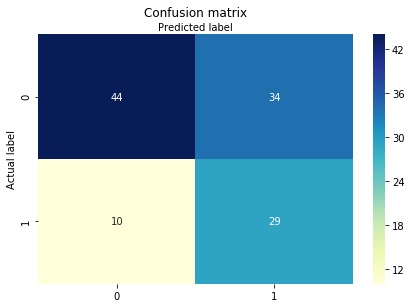

In [161]:
cnf_matrix= metrics.confusion_matrix(y_test, y_pred)

tree_sen = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0])
tree_neg = cnf_matrix[1,0]

print(cnf_matrix)

matriz_confusion(cnf_matrix)


### Resultados

In [162]:
resultados(cnf_matrix)

La sensibilidad es:  0.7435897435897436  la especificidad es:  0.5641025641025641  y los falsos negativos son:  10


### Visualización

[Text(167.4, 163.07999999999998, 'X[4] <= 228.0\ngini = 0.5\nsamples = 256\nvalue = [128, 128]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 102\nvalue = [0, 102]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.281\nsamples = 154\nvalue = [128, 26]')]

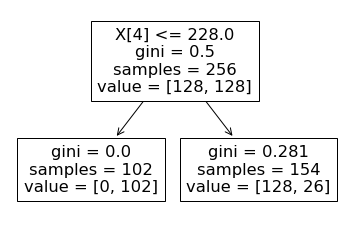

In [163]:
from sklearn import tree
tree.plot_tree(tree_model)

### Curvas de Aprendizaje

29 29 29


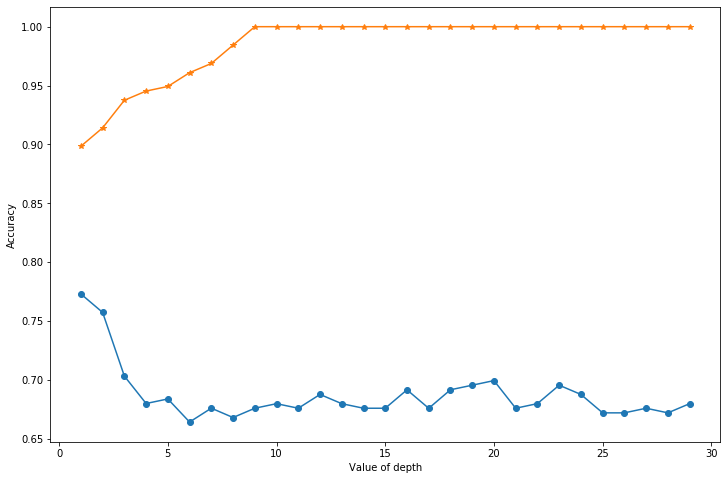

In [164]:
scores_train=[]
k_scores = []
depth_range = range(1, 30)

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(tree, X_train_res, y_train_res, cv=3, scoring='accuracy')
    tree.fit(X_train_res,y_train_res)
    scores_train.append(tree.score(X_train_res,y_train_res))
    k_scores.append(scores.mean())

print(len(scores_train),len(k_scores),len(depth_range))
plt.figure(figsize=(12,8))
plt.plot(depth_range , k_scores, marker='o', label='cross-validation')
plt.plot(depth_range , scores_train, marker='*', label='train')
plt.xlabel('Value of depth')
plt.ylabel('Accuracy')
tree_ac_val=max(k_scores)
tree_pre_val=cross_val_score(tree_model, X_train_res_nor, y_train_res, cv=3, scoring='precision').mean()
tree_rec_val=cross_val_score(tree_model, X_train_res_nor, y_train_res, cv=3, scoring='recall').mean()

## Naive Bayes

In [165]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_gnb = gnb.predict(X_test)
print('Accuracy:', gnb.score(X_test, y_test))


Accuracy: 0.6153846153846154


#### Matriz confusión

In [166]:
cnf_matrix_gnb= metrics.confusion_matrix(y_test, y_pred_gnb)

print(cnf_matrix_gnb)

[[35 43]
 [ 2 37]]


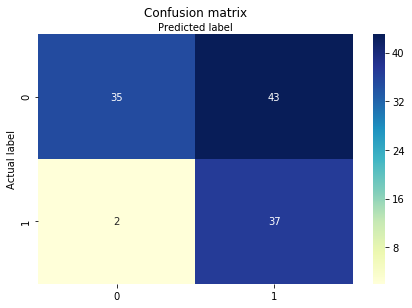

In [167]:
matriz_confusion(cnf_matrix_gnb)

### Resultados

In [168]:
resultados(cnf_matrix_gnb)

La sensibilidad es:  0.9487179487179487  la especificidad es:  0.44871794871794873  y los falsos negativos son:  2


### Datos Balanceados

In [172]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
bay_ac=gnb.score(X_test, y_test)
print('Accuracy:', gnb.score(X_test, y_test))

Accuracy: 0.5897435897435898


In [0]:
bay_ac_val=cross_val_score(gnb, X_train_res, y_train_res, cv=3, scoring='accuracy').mean()
bay_pre_val=cross_val_score(gnb, X_train_res_nor, y_train_res, cv=3, scoring='precision').mean()
bay_rec_val=cross_val_score(gnb, X_train_res_nor, y_train_res, cv=3, scoring='recall').mean()

#### Matriz confusión

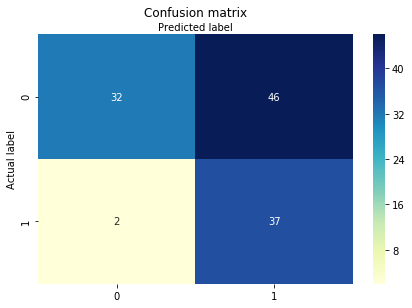

In [174]:
cnf_matrix= metrics.confusion_matrix(y_test, y_pred)
bay_sen = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0])
bay_neg = cnf_matrix[1,0]
matriz_confusion(cnf_matrix)

### Resultados

In [175]:
resultados(cnf_matrix_gnb)

La sensibilidad es:  0.9487179487179487  la especificidad es:  0.44871794871794873  y los falsos negativos son:  2


### Tabla de comparación de modelos

El mejor modelo esta entre k-NN que tiene la mejor accuracy el Naive Bayes que tiene la mejor sensibilidad y el menor numero de falsos negativos

In [176]:
from tabulate import tabulate
#validación
resultados = [['Validación', 'Regression','K-NN','Decision Tree','Naive Bayes'],
         ['Accuracy', reg_ac_val, knn_ac_val, tree_ac_val,bay_ac_val],
         ['Sensibilidad', reg_rec_val, knn_rec_val, tree_rec_val,bay_rec_val],
         ['Precisión', reg_pre_val, knn_pre_val, tree_pre_val,bay_pre_val]]
print(tabulate(resultados, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════╤══════════════╤══════════╤═════════════════╤═══════════════╕
│ Validación   │   Regression │     K-NN │   Decision Tree │   Naive Bayes │
╞══════════════╪══════════════╪══════════╪═════════════════╪═══════════════╡
│ Accuracy     │     0.793069 │ 0.832057 │        0.772959 │      0.726721 │
├──────────────┼──────────────┼──────────┼─────────────────┼───────────────┤
│ Sensibilidad │     0.726098 │ 0.686969 │        0.730159 │      0.546881 │
├──────────────┼──────────────┼──────────┼─────────────────┼───────────────┤
│ Precisión    │     0.839957 │ 0.856057 │        0.741758 │      0.857172 │
╘══════════════╧══════════════╧══════════╧═════════════════╧═══════════════╛


In [177]:
#test
from tabulate import tabulate
resultados = [['Test', 'Regression','K-NN','Decision Tree','Naive Bayes'],
         ['Accuracy', reg_ac, knn_ac, tree_ac,bay_ac],
         ['Sensibilidad', reg_sen, knn_sen, tree_sen,bay_sen],
         ['Falsos negativos', reg_neg, knn_neg, tree_neg,bay_neg]]
print(tabulate(resultados, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════╤══════════════╤══════════╤═════════════════╤═══════════════╕
│ Test             │   Regression │     K-NN │   Decision Tree │   Naive Bayes │
╞══════════════════╪══════════════╪══════════╪═════════════════╪═══════════════╡
│ Accuracy         │     0.606838 │ 0.735043 │        0.623932 │      0.589744 │
├──────────────────┼──────────────┼──────────┼─────────────────┼───────────────┤
│ Sensibilidad     │     0.74359  │ 0.846154 │        0.74359  │      0.948718 │
├──────────────────┼──────────────┼──────────┼─────────────────┼───────────────┤
│ Falsos negativos │    10        │ 6        │       10        │      2        │
╘══════════════════╧══════════════╧══════════╧═════════════════╧═══════════════╛
